<a href="https://colab.research.google.com/github/VoHuynhDuyThanh/AI/blob/main/Homework_week9/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

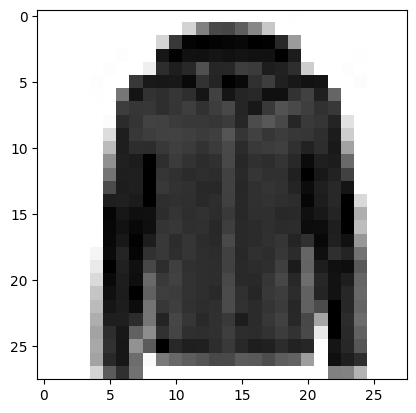

Cai nay la 4


In [57]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
import matplotlib.pyplot as plt

(x_trains, y_trains), (x_tests, y_tests ) = fashion_mnist.load_data()

hinh = x_trains[5000]
plt.imshow(hinh,cmap=plt.cm.binary)
plt.show()
print('Cai nay la',y_trains[5000])

In [41]:
len(x_trains)

60000

In [44]:
x_tests.shape


(10000, 28, 28)

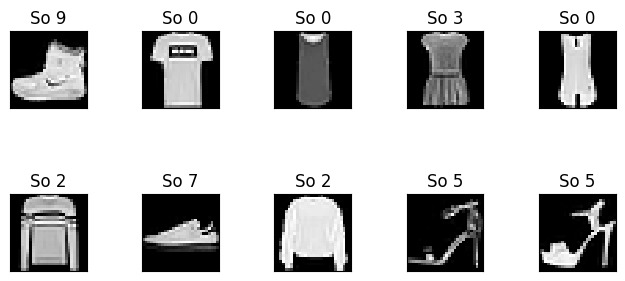

In [58]:
for i in range(10):
  plt.subplot(3, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_trains[i], cmap = 'gray', interpolation = 'none')
  plt.title('So {}'.format(y_trains[i]))
  plt.xticks([])
  plt.yticks([])

In [45]:
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,input_shape = (28*28,), activation='relu', name="Layer_1"))
model.add(Dense(256,input_shape = (28*28,), activation='relu', name="Layer_2"))
model.add(Dense(128,input_shape = (28*28,), activation='relu', name="Layer_3"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               401920    
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
x_trains = x_trains.reshape((60000, 28*28))
x_train = x_trains.astype('float32')/255 
x_tests = x_tests.reshape((10000, 28*28))
x_test = x_tests.astype('float32')/255

In [47]:
from keras.utils import to_categorical
y_train = to_categorical(y_trains, 10)
y_test = to_categorical(y_tests, 10)

In [48]:
#Bien dich
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_accunacy:', test_acc)
print('test_loss:', test_loss)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.5678 - accuracy: 0.7914
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3881 - accuracy: 0.8546
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.3436 - accuracy: 0.8713
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3152 - accuracy: 0.8817
Epoch 5/10
469/469 [==============================] - 5s 12ms/step - loss: 0.2960 - accuracy: 0.8891
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2802 - accuracy: 0.8939
Epoch 7/10
469/469 [==============================] - 5s 12ms/step - loss: 0.2659 - accuracy: 0.8996
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - loss: 0.2570 - accuracy: 0.9034
Epoch 9/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2473 - accuracy: 0.9074
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3550 - accurac

1/1 [==============================] - 0s 43ms/step


array([6])

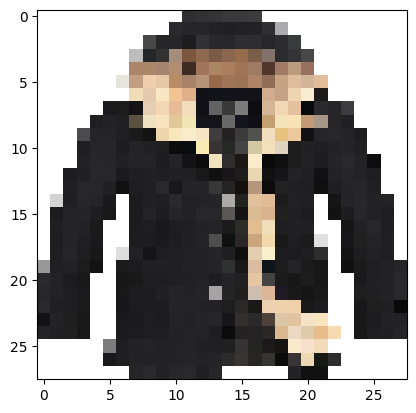

In [61]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

img = load_img('Coat.png', target_size = (28,28))
plt.imshow(img)
img = img.convert('L')
img = img_to_array(img)
img = img.reshape(1, 28*28)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)